<a href="https://pandas.pydata.org/">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" width="300px">
</a>


# Data Wrangling



## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#Identify-missing-Data">Identify and handle missing values</a>      
    <li><a href="https://#deal_missing_values">Deal with missing values</li>
    <li><a href="https://#correct_data_format">Correct data format</a></li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data Wrangling is the process of cleaning the raw data set and convert the information into a format that it is compatible for analysis. Part of this process include data munging and data visualisation.

Data Wrangling is the first and essential part of data analysis, however it is often  the most time-consuming and tedious part of it.


### Data Wrangling Steps
The exact tasks required  basic steps include:

* **Discovering** : 
Understand the  data and find out  what information is useful for your problem 
* **Structuring** :
Standardise the data format for disparate types of data and make the data usable for automated or semiautomated data analysis. The data must be structured to fit the analytics model 

* **Cleaning** : 
There are outliers in any dataset that could alter the outcome of an analysis. This means that structured data must be cleaned to improve analysis. This involves changing null values, eliminating redundancies, standardizing formatting, and changing redundancies to improve data consistency


* **Enriching**
You are pretty familiar with the data at this point. This is the moment to ask yourself if you want to enhance the data. Are you looking to add other data to it?


*  **Validating** 
This step involves iterative programming steps that authenticate your data’s quality and safety. For example, you may have problems if your data is not clean or enriched and the attributes are not distributed evenly.


## Tabular Data analysis with Pandas Library
Pandas library is widely used to discover, clean and stracture the data 


> _Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language._

From https://pandas.pydata.org/.

## Visualise Data 
Visualisation libraries such as matplot lib and seaborn are aften used to plot and statistically analyse data.
This way its easy to discover and clean 'outliners' which are data points that dont make sense and often mess the data.

<h3>Import data</h3>
<p>
You can find the "Suicide data, modified " from the following link: <a href="https://"> </a>. 
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


In [2]:
import pandas as pd
import matplotlib.pylab as plt


<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


In [86]:
#filename = "https://....Data%20files/auto.csv"

## Reading the Dataset from a file in your computer 

In [10]:
# Read the file from my computer"
#NOTE: Change the path to much yours
#my_path = "/Users/mary-tziraki/git/TeamCoders_Event_Based_Model/2_DataCleaningAndWrangling/who_suicide_statistics_modified3.csv"
my_path = "./who_suicide_statistics_modified3.csv"
data_raw = pd.read_csv(my_path , header=None)

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [4]:
data_raw.head()

0     1       2            3            4           5             6  \
0  country  year     sex          age  suicides_no  population  HDI for year   
1  Albania  1987    male  15-24 years           21      312900           NaN   
2  Albania  1987    male  35-54 years           16      308000           NaN   
3  Albania  1987  female  15-24 years           14      289700           NaN   
4  Albania  1987    male    75+ years            1       21800           NaN   

                    7  
0   gdp_for_year ($)   
1       2,156,624,900  
2       2,156,624,900  
3       2,156,624,900  
4       2,156,624,900

In [5]:
data_raw.shape

(27841, 8)

In [6]:
data_raw.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
7    object
dtype: object

## Observations
* The data frame has 27840 rows and 8 columns hat describe the demographics of the suicides in the world.
* There is no headers, the columns are indexed. 
* The header is in the first row ( 0 index) we need to move the row and make it header.
* The data frame is an object by itself and within it the data all columns are all objects. 
* It is not the data structure that is compartible with the analysis we will follow.

## How to replace the header with the first row

We need to create headers with the descriptions that are in the firts row ( 0 ) and delete row 0. There are various ways to do that.
I'm choosing the following:

* First row of the dataframe is assigned to the df.columns using the **df.iloc[0]** statement
* Next, the dataframe is sliced from the second row using its index 1 (using **.iloc[1:]**) 
* Within the same line we reset its row index using the **reset_index()** method.
* With these steps, the header of the dataframe is replaced with the first row of the dataframe.


In [11]:
data_raw.columns = data_raw.iloc[0]
data_raw = data_raw.iloc[1:].reset_index(drop=True) #This method will  reset the index of the rows 

data_raw.head()

0  country  year     sex          age suicides_no population HDI for year  \
0  Albania  1987    male  15-24 years          21     312900          NaN   
1  Albania  1987    male  35-54 years          16     308000          NaN   
2  Albania  1987  female  15-24 years          14     289700          NaN   
3  Albania  1987    male    75+ years           1      21800          NaN   
4  Albania  1987    male  25-34 years           9     274300          NaN   

0  gdp_for_year ($)   
0      2,156,624,900  
1      2,156,624,900  
2      2,156,624,900  
3      2,156,624,900  
4      2,156,624,900

### ----------------------------------------------------------------------
**Another way**
We need to create headers with the descriptions in row 0 and delete row 0.

Then, we create a Python list **headers** containing name of headers.


In [92]:
##headers = ["country","year","gender","age","suicides_no","population","HDI for year","gdp_for_year ($)"]

In [93]:
# data_raw.columns = headers # Add Headers
# 2 data_raw= data_raw.drop(0, axis =0)  # delete the row with label 
#3 data_raw.head(10)

Or Use the Pandas method <b>read_csv()</b> to load the data from the file. Set the parameter  "names" equal to the Python list "headers".


In [94]:
# df = pd.read_csv(my_path, names = headers)

### -------------------------------------------------------------------------

Use the method **.head()** to display **the firt five rows** of the dataframe.


In [12]:
# To see what the data set looks like, we'll use the head() method for the first 500 lines.
data_raw.head(20)

0   country  year     sex          age suicides_no population HDI for year  \
0   Albania  1987    male  15-24 years          21     312900          NaN   
1   Albania  1987    male  35-54 years          16     308000          NaN   
2   Albania  1987  female  15-24 years          14     289700          NaN   
3   Albania  1987    male    75+ years           1      21800          NaN   
4   Albania  1987    male  25-34 years           9     274300          NaN   
5   Albania  1987  female    75+ years           1      35600          NaN   
6   Albania  1987  female  35-54 years           6     278800          NaN   
7   Albania  1987  female  25-34 years           4     257200          NaN   
8   Albania  1987    male  55-74 years           1     137500          NaN   
9   Albania  1987  female   5-14 years         NaN     311000          NaN   
10  Albania  1987  female  55-74 years         NaN     144600          NaN   
11  Albania  1987    male   5-14 years         NaN     338200          NaN   
12  Albania  1988  female    75+ years           2      36400          NaN   
13  Albania  1988    male  15-24 years          17     319200          NaN   
14  Albania  1988    male    75+ years           1      22300          NaN   
15  Albania  1988    male  35-54 years          14     314100          NaN   
16  Albania  1988    male  55-74 years           4     140200          NaN   
17  Albania  1988  female  15-24 years           8     295600          NaN   
18  Albania  1988  female  55-74 years           3     147500          NaN   
19  Albania  1988  female  25-34 years           5     262400          NaN   

0   gdp_for_year ($)   
0       2,156,624,900  
1       2,156,624,900  
2       2,156,624,900  
3       2,156,624,900  
4       2,156,624,900  
5       2,156,624,900  
6       2,156,624,900  
7       2,156,624,900  
8       2,156,624,900  
9       2,156,624,900  
10      2,156,624,900  
11      2,156,624,900  
12      2,126,000,000  
13      2,126,000,000  
14      2,126,000,000  
15      2,126,000,000  
16      2,126,000,000  
17      2,126,000,000  
18      2,126,000,000  
19      2,126,000,000

## Question 1
Show all the countries in the data set

In [13]:
data_raw_countries=data_raw['country']
print(data_raw_countries)

0            Albania
1            Albania
2            Albania
3            Albania
4            Albania
            ...     
27835        Belgium
27836       Thailand
27837    Netherlands
27838        Grenada
27839         Mexico
Name: country, Length: 27840, dtype: object


## Question 2
List all countries and find how many they are.

In [14]:
print((data_raw_countries).value_counts())

Austria                   383
Netherlands               383
Mauritius                 382
Iceland                   382
Argentina                 373
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64


## Question3
List all the countries alphabetically


In [15]:
data_raw_countries_alphabetically = data_raw['country'].unique().astype(str)
data_raw_countries_alphabetically

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [16]:
type(data_raw_countries_alphabetically)

numpy.ndarray

The data_raw_countries_alphabeticallly is a numpy array that we need to convert it to list.


In [17]:
data_countries_list= data_raw_countries_alphabetically.tolist() # Convert a numpy array to a list
print(f'The list of countries is:{data_countries_list}')

The list of countries is:['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and

**Observations:**
   * There are many NaN (Not a Number) data points in the suicide_no column, that indicate missing values.
   * The HDI column is dominated by NaN. We need to delete the column with the Human Development Index because we will not use it for the analysis and it has lots of missing values that we cannot deal with them. We will also save space and time. 
   


# How to work with missing data?
As we can see, several NaN, there might be  Null or anyother string values in the dataframe; those are missing values which may hinder our further analysis.

* So, how do we identify all those missing values and deal with them?
* How to work with missing data?

Steps for working with missing data:

</ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>




# Identify missing Data 

<h4>Evaluating for Missing Data</h4> 

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.



When we use the **isnull()** method the outpu is True wnen there is Null, and False when there is a real value. The opposite happens when we use the .notnull() method

In [60]:
(data_raw.isnull()).value_counts() # Indicates with True that there are Nulls and counts the values that are numbers 

country  year   sex    age    suicides_no  population  HDI for year   gdp_for_year ($) 
False    False  False  False  False        False       True          False                 16357
                                                       False         False                  7218
                              True         False       True          False                  3115
                                                       False         False                  1150
dtype: int64

There are Null values in just two columns at the suicides_no and at the HDI for year column

The opposite we observe with **.notnull()** Similar to not null is to use the **(~)** in front of the dataset and then the .isnull(). The tilde sign indicates negation.  

In [61]:
(data_raw.notnull()).value_counts() # Indicates with True that we have values and with False where there are Nulls and counts the values that are numbers (not Null)

country  year  sex   age   suicides_no  population  HDI for year   gdp_for_year ($) 
True     True  True  True  True         True        False         True                  16357
                                                    True          True                   7218
                           False        True        False         True                   3115
                                                    True          True                   1150
dtype: int64

In [26]:
(~data_raw.isnull()).value_counts() # The ~ indicates negation and here infont of isnull results to notnull()

country  year  sex   age   suicides_no  population  HDI for year   gdp_for_year ($) 
True     True  True  True  True         True        False         True                  16357
                                                    True          True                   7218
                           False        True        False         True                   3115
                                                    True          True                   1150
dtype: int64

In [27]:
missing_data = data_raw.isnull() # find data that are null and return 'True' if is null and 'False' if it is not
missing_data.head(20)

0   country   year    sex    age  suicides_no  population  HDI for year  \
0     False  False  False  False        False       False          True   
1     False  False  False  False        False       False          True   
2     False  False  False  False        False       False          True   
3     False  False  False  False        False       False          True   
4     False  False  False  False        False       False          True   
5     False  False  False  False        False       False          True   
6     False  False  False  False        False       False          True   
7     False  False  False  False        False       False          True   
8     False  False  False  False        False       False          True   
9     False  False  False  False         True       False          True   
10    False  False  False  False         True       False          True   
11    False  False  False  False         True       False          True   
12    False  False  False  False        False       False          True   
13    False  False  False  False        False       False          True   
14    False  False  False  False        False       False          True   
15    False  False  False  False        False       False          True   
16    False  False  False  False        False       False          True   
17    False  False  False  False        False       False          True   
18    False  False  False  False        False       False          True   
19    False  False  False  False        False       False          True   

0    gdp_for_year ($)   
0                False  
1                False  
2                False  
3                False  
4                False  
5                False  
6                False  
7                False  
8                False  
9                False  
10               False  
11               False  
12               False  
13               False  
14               False  
15               False  
16               False  
17               False  
18               False  
19               False

## How to count the missing values in the data frame

### Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of data values, (number of  "False" here). 




In [32]:
#The following (commented code) is the same with the shortened code that it follows 
## for column in missing_data.columns.values.tolist():
 ## print(column)
 ## print (missing_data[column].value_counts())
 ## print("") 

In [62]:
for column in data_raw.columns:
    print(column)
    print(missing_data[column].value_counts())
    print()

country
False    27840
Name: country, dtype: int64

year
False    27840
Name: year, dtype: int64

sex
False    27840
Name: sex, dtype: int64

age
False    27840
Name: age, dtype: int64

suicides_no
False    23575
True      4265
Name: suicides_no, dtype: int64

population
False    27840
Name: population, dtype: int64

HDI for year
True     19472
False     8368
Name: HDI for year, dtype: int64

 gdp_for_year ($) 
False    27840
Name:  gdp_for_year ($) , dtype: int64



In [63]:
data_raw.suicides_no.describe()

count     23575
unique     1577
top           1
freq       1876
Name: suicides_no, dtype: object

In [64]:
print (data_raw.isnull().sum()) # Find the data that are Null in the whole data frame  

0
country                   0
year                      0
sex                       0
age                       0
suicides_no            4265
population                0
HDI for year          19472
 gdp_for_year ($)         0
dtype: int64


The length of the dataframe is 27841 and the column suicides_no has 23575 numbers. It is shorter than the total length of the data 27841 by 27841- 23575= 4265. It is indicated as True (is null) in the count. The missing values therefore there must be strings characters in the column. We need to investigate it.

The HDI column has lots of missing data 8368 values are missing. We will not use it for the analysis and it will be good to delete this column.

## How to investigate if there are string values in the column and indicate them.
To indentify the non-integer values in the column suicides_no, we need to import the module Regular expresions re. 
A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.

In [65]:
# Import module Regular expresions as re.
#The re module provides an interface to the regular expression engine, 
# allowing you to compile REs into objects and then perform matches with them
import re 
replace = re.compile("([a-zA-Z]+)")  # compile any alphabetic character

data_raw['string'] = data_raw['suicides_no'].str.extract(replace)
data_raw['integer'] = data_raw['suicides_no'].str.replace(replace, " ")
#data_raw.head(500)
data_raw['string'].unique()

array([nan, 'Null', 'Unknown'], dtype=object)

 In the column suicide-no there are the strings **'Null'**, **'Unknown'** and **nan (not a number)** and we need to replace them.

Another way without the regular expresions is to use the **.isdigit()** method to a string.


In [66]:
suicides=data_raw['suicides_no']

The following code takes all the strings in the column which have digits and sets it to False. Which means that takes all the strings that have no digits. Using the method **unique()** identifies which are these strings.

In [70]:
non_numeric=data_raw['suicides_no'].str.isdigit() == False

In [71]:
data_raw['suicides_no'][non_numeric].unique()

array(['Null', 'Unknown'], dtype=object)

In [67]:
#data_raw['suicides_no'][data_raw['suicides_no'].str.isdigit() == False].unique()

array(['Null', 'Unknown'], dtype=object)

We cannot see the NaN values and we apply the pd.numeric (explain)

It's an elegant way to find the strings and words in the datasets without the regular expresions, however it doesn't show us the NaN datapoints. We can add this with the following coding which is more complete and shorten than regular expresions (re).

In [72]:
suicides2 = suicides.apply(pd.to_numeric, errors='coerce')

In [73]:
print(data_raw['suicides_no'][suicides2.isna()].unique())# Shows the data which are not numeric

[nan 'Null' 'Unknown']


The above shows that in the data there are points which as NaN (not an number) and have the word Null and Unknown.

In [74]:
data_raw.head(20)

0   country  year     sex          age suicides_no population HDI for year  \
0   Albania  1987    male  15-24 years          21     312900          NaN   
1   Albania  1987    male  35-54 years          16     308000          NaN   
2   Albania  1987  female  15-24 years          14     289700          NaN   
3   Albania  1987    male    75+ years           1      21800          NaN   
4   Albania  1987    male  25-34 years           9     274300          NaN   
5   Albania  1987  female    75+ years           1      35600          NaN   
6   Albania  1987  female  35-54 years           6     278800          NaN   
7   Albania  1987  female  25-34 years           4     257200          NaN   
8   Albania  1987    male  55-74 years           1     137500          NaN   
9   Albania  1987  female   5-14 years         NaN     311000          NaN   
10  Albania  1987  female  55-74 years         NaN     144600          NaN   
11  Albania  1987    male   5-14 years         NaN     338200          NaN   
12  Albania  1988  female    75+ years           2      36400          NaN   
13  Albania  1988    male  15-24 years          17     319200          NaN   
14  Albania  1988    male    75+ years           1      22300          NaN   
15  Albania  1988    male  35-54 years          14     314100          NaN   
16  Albania  1988    male  55-74 years           4     140200          NaN   
17  Albania  1988  female  15-24 years           8     295600          NaN   
18  Albania  1988  female  55-74 years           3     147500          NaN   
19  Albania  1988  female  25-34 years           5     262400          NaN   

0   gdp_for_year ($)  string integer  
0       2,156,624,900    NaN      21  
1       2,156,624,900    NaN      16  
2       2,156,624,900    NaN      14  
3       2,156,624,900    NaN       1  
4       2,156,624,900    NaN       9  
5       2,156,624,900    NaN       1  
6       2,156,624,900    NaN       6  
7       2,156,624,900    NaN       4  
8       2,156,624,900    NaN       1  
9       2,156,624,900    NaN     NaN  
10      2,156,624,900    NaN     NaN  
11      2,156,624,900    NaN     NaN  
12      2,126,000,000    NaN       2  
13      2,126,000,000    NaN      17  
14      2,126,000,000    NaN       1  
15      2,126,000,000    NaN      14  
16      2,126,000,000    NaN       4  
17      2,126,000,000    NaN       8  
18      2,126,000,000    NaN       3  
19      2,126,000,000    NaN       5

#### In the column suicide-no there are the strings 'Null', 'Unknown' and nan and we need to replace them.

## 2) Deal with missing values in the data set

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it basedm on other functions
    </li>
</ol>



## a) Drop / Delete a column with lots of missing data.
 * I will cut the comumn HDI for year, There are a lot of missing vaues there and I dont think that if contributes to the result.
 * I will also cut the columns, string and integer, because they dont serve me any longer
 * I will name the new Data Frame **data_frame** because it is not the raw data anymore


In [75]:
data_frame= data_raw.drop(['HDI for year', 'string', 'integer'], axis = 1)
data_frame

0          country  year     sex          age suicides_no population  \
0          Albania  1987    male  15-24 years          21     312900   
1          Albania  1987    male  35-54 years          16     308000   
2          Albania  1987  female  15-24 years          14     289700   
3          Albania  1987    male    75+ years           1      21800   
4          Albania  1987    male  25-34 years           9     274300   
...            ...   ...     ...          ...         ...        ...   
27835      Belgium  2011  female  25-34 years           6     707535   
27836     Thailand  2016    male    75+ years         152    1124052   
27837  Netherlands  1998  female  15-24 years          21     934500   
27838      Grenada  2002  female   5-14 years         NaN      11760   
27839       Mexico  1988  female    75+ years           7     614000   

0      gdp_for_year ($)   
0          2,156,624,900  
1          2,156,624,900  
2          2,156,624,900  
3          2,156,624,900  
4          2,156,624,900  
...                  ...  
27835    527,008,453,887  
27836    411,755,164,833  
27837    432,476,116,419  
27838        540,336,926  
27839    183,144,164,357  

[27840 rows x 7 columns]

In [76]:
data_frame.shape


(27840, 7)

So far we have investigated that there are 4265 missing integers in the suicide_no column which would be the strings 
'nan', 'Unknown', "Null".

We have deleted the HDI for year colum because it had a lot of missing values

We have created a new data_frame with the data, which is not longer the raw data.

##  b) REPLACE : Locate the data in suicides_no that appeared as strings and REPLACE them

In [77]:
df_null=data_frame.loc[data_frame['suicides_no']=='Null']
df_null

0                  country  year     sex          age suicides_no population  \
378    Antigua and Barbuda  1994    male  15-24 years        Null       5976   
388    Antigua and Barbuda  1995  female  55-74 years        Null       3808   
401    Antigua and Barbuda  1998  female    75+ years        Null       1476   
558    Antigua and Barbuda  2013    male  15-24 years        Null       8061   
1360                 Aruba  2006  female  55-74 years        Null       8553   
1384                 Aruba  2008  female   5-14 years        Null       7269   
1389                 Aruba  2008    male    75+ years        Null       1333   
1421                 Aruba  2011  female   5-14 years        Null       7064   
10569              Grenada  2005  female   5-14 years        Null      10711   
10578              Grenada  2006  female   5-14 years        Null      10384   
10583              Grenada  2006    male   5-14 years        Null      10658   
15877                Malta  1990  female   5-14 years        Null      27400   

0      gdp_for_year ($)   
378          589,429,593  
388          577,280,741  
401          727,860,593  
558        1,192,925,407  
1360       2,421,474,860  
1384       2,791,960,894  
1389       2,791,960,894  
1421       2,584,463,687  
10569        695,370,296  
10578        698,700,667  
10583        698,700,667  
15877      2,547,163,582

In [79]:
df_null.shape

(12, 7)

There are 4265 points at the suicides_no with the wrong/missing values. It's exactly what we have calculated with the missing_values variable.

In [80]:
#### Count the values of the 'Null' in 'suicides_no' column 
#data_null["suicides_no"].value_counts()  # Same as:  data_null.suicides_no.value_counts()  
df_null.suicides_no.value_counts()  

### If you want to be concise you could write it elegantly in one line
# data_frame.loc[data_frame['suicides_no']=='Null'].suicides_no.value_counts()

Null    12
Name: suicides_no, dtype: int64

In [81]:
df_unknown=data_frame.loc[data_frame['suicides_no'] =='Unknown'] 
df_unknown  ## show the lines with the word Unknown in the suicides_no column 

0      country  year     sex          age suicides_no population  \
10610  Grenada  2009  female  15-24 years     Unknown      11815   
10615  Grenada  2009  female    75+ years     Unknown       2227   
10622  Grenada  2010  female  15-24 years     Unknown      11637   
10629  Grenada  2010    male  25-34 years     Unknown       9006   
10639  Grenada  2011  female  55-74 years     Unknown       5474   
10660  Grenada  2013  female  35-54 years     Unknown      10858   
10678  Grenada  2014    male  35-54 years     Unknown      11369   
10691  Grenada  2015    male   5-14 years     Unknown       9409   

0      gdp_for_year ($)   
10610        771,278,111  
10615        771,278,111  
10622        771,015,889  
10629        771,015,889  
10639        778,648,667  
10660        842,620,111  
10678        911,481,481  
10691        997,007,926

In [82]:
df_unknown.suicides_no.value_counts() ## count the values with the word Unknown in the suicides_no column 

Unknown    8
Name: suicides_no, dtype: int64

## REPLACE  incorrect / missing values!
There are three types of data in the column 'suicides_no' in our Data Frame that need to be clered out. The word 'Null',the word "Unknown" and NaN (Not a Number). I will replace the word Null' with 0 , because its is actually zero. 

The strategy with other words which dont actualy contribute to data (unless it is categorical data), is to replace them with the strin NaN.  I replace " " with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Then we can delete the NaN data points.


Here we use the functions to use to localise and replace one value with another:

* .loc[data['Column Name']=='Character to localise']
to localise the Characters in the Column name
* .replace(A, B, inplace = True) 
to replace A value  by B value.



In [83]:
data_frame.replace('Null', 0, inplace = True) ## to replace the word 'Null' by 0 :(zero)
data_frame.loc[data_frame['suicides_no'] ==0] 

0                  country  year     sex          age suicides_no population  \
378    Antigua and Barbuda  1994    male  15-24 years           0       5976   
388    Antigua and Barbuda  1995  female  55-74 years           0       3808   
401    Antigua and Barbuda  1998  female    75+ years           0       1476   
558    Antigua and Barbuda  2013    male  15-24 years           0       8061   
1360                 Aruba  2006  female  55-74 years           0       8553   
1384                 Aruba  2008  female   5-14 years           0       7269   
1389                 Aruba  2008    male    75+ years           0       1333   
1421                 Aruba  2011  female   5-14 years           0       7064   
10569              Grenada  2005  female   5-14 years           0      10711   
10578              Grenada  2006  female   5-14 years           0      10384   
10583              Grenada  2006    male   5-14 years           0      10658   
15877                Malta  1990  female   5-14 years           0      27400   

0      gdp_for_year ($)   
378          589,429,593  
388          577,280,741  
401          727,860,593  
558        1,192,925,407  
1360       2,421,474,860  
1384       2,791,960,894  
1389       2,791,960,894  
1421       2,584,463,687  
10569        695,370,296  
10578        698,700,667  
10583        698,700,667  
15877      2,547,163,582

In [85]:
data_frame.loc[data_frame['suicides_no'] =='Unknown'] 

0      country  year     sex          age suicides_no population  \
10610  Grenada  2009  female  15-24 years     Unknown      11815   
10615  Grenada  2009  female    75+ years     Unknown       2227   
10622  Grenada  2010  female  15-24 years     Unknown      11637   
10629  Grenada  2010    male  25-34 years     Unknown       9006   
10639  Grenada  2011  female  55-74 years     Unknown       5474   
10660  Grenada  2013  female  35-54 years     Unknown      10858   
10678  Grenada  2014    male  35-54 years     Unknown      11369   
10691  Grenada  2015    male   5-14 years     Unknown       9409   

0      gdp_for_year ($)   
10610        771,278,111  
10615        771,278,111  
10622        771,015,889  
10629        771,015,889  
10639        778,648,667  
10660        842,620,111  
10678        911,481,481  
10691        997,007,926

In [86]:
import numpy as np  # Import numpy to use for replace method

In [88]:

## Replace a "Unknown" to NaN and the "Null"  with 0, (altogether) using Numpy library!!
#data_frame.replace("Null", 0, inplace = True)    # I've shown this above     
data_frame.replace("Unknown", np.nan, inplace = True)
data_frame.head(20)

0   country  year     sex          age suicides_no population  \
0   Albania  1987    male  15-24 years          21     312900   
1   Albania  1987    male  35-54 years          16     308000   
2   Albania  1987  female  15-24 years          14     289700   
3   Albania  1987    male    75+ years           1      21800   
4   Albania  1987    male  25-34 years           9     274300   
5   Albania  1987  female    75+ years           1      35600   
6   Albania  1987  female  35-54 years           6     278800   
7   Albania  1987  female  25-34 years           4     257200   
8   Albania  1987    male  55-74 years           1     137500   
9   Albania  1987  female   5-14 years         NaN     311000   
10  Albania  1987  female  55-74 years         NaN     144600   
11  Albania  1987    male   5-14 years         NaN     338200   
12  Albania  1988  female    75+ years           2      36400   
13  Albania  1988    male  15-24 years          17     319200   
14  Albania  1988    male    75+ years           1      22300   
15  Albania  1988    male  35-54 years          14     314100   
16  Albania  1988    male  55-74 years           4     140200   
17  Albania  1988  female  15-24 years           8     295600   
18  Albania  1988  female  55-74 years           3     147500   
19  Albania  1988  female  25-34 years           5     262400   

0   gdp_for_year ($)   
0       2,156,624,900  
1       2,156,624,900  
2       2,156,624,900  
3       2,156,624,900  
4       2,156,624,900  
5       2,156,624,900  
6       2,156,624,900  
7       2,156,624,900  
8       2,156,624,900  
9       2,156,624,900  
10      2,156,624,900  
11      2,156,624,900  
12      2,126,000,000  
13      2,126,000,000  
14      2,126,000,000  
15      2,126,000,000  
16      2,126,000,000  
17      2,126,000,000  
18      2,126,000,000  
19      2,126,000,000

Based on the summary above, each column has 27840 rows of data and only one of the columns the suicide_no containes missing data:

<ol>
    <li>"suicides_no": 4273 missing data which are replaced with NaN</li>
    
</ol>


## DROP/ DELETE  NaN 
In order to deal with NaN we have to create a numpy array where the NaN appears. We can visualise teh data frame by calling .head() or .tail()

The way to  delete the NaN is  using the *.dropna()*  to the  data. Imediately afterwards you need to  to reset the index of the data frame as there are deletd values 


In [112]:
data_frame.tail(20).reset_index()  # use .reset_index()  to visualise it and count it better

0   index                       country  year     sex          age  \
0   27820             Republic of Korea  1992    male  15-24 years   
1   27821                      Bulgaria  2003    male   5-14 years   
2   27822                  South Africa  2009  female    75+ years   
3   27823                        Canada  2006  female  25-34 years   
4   27824                       Austria  2003  female   5-14 years   
5   27825  Saint Vincent and Grenadines  2009  female   5-14 years   
6   27826                    Azerbaijan  2003  female  35-54 years   
7   27827                      Suriname  2010    male  15-24 years   
8   27828                    Seychelles  1987  female  25-34 years   
9   27829                   Puerto Rico  1992  female    75+ years   
10  27830                        Kuwait  2007    male  55-74 years   
11  27831                     Australia  1995    male  35-54 years   
12  27832                      Colombia  1989    male  35-54 years   
13  27833                     Argentina  1988  female   5-14 years   
14  27834                       Ukraine  2005  female  25-34 years   
15  27835                       Belgium  2011  female  25-34 years   
16  27836                      Thailand  2016    male    75+ years   
17  27837                   Netherlands  1998  female  15-24 years   
18  27838                       Grenada  2002  female   5-14 years   
19  27839                        Mexico  1988  female    75+ years   

0  suicides_no population  gdp_for_year ($)   
0           48    4456500    350,051,111,253  
1            6     407671     20,982,685,981  
2            3     502919    297,216,730,669  
3          118    2177957  1,315,415,197,461  
4          NaN     457342    261,695,778,781  
5          NaN       9944        674,922,481  
6           12    1137200      7,276,013,032  
7           18      48112      4,368,398,048  
8          NaN       4800        249,267,040  
9            2      82500     34,630,430,000  
10           2      99708    114,641,097,818  
11         587    2507400    367,216,364,716  
12         152    2802188     39,540,080,200  
13          11    3115000    126,206,817,196  
14         182    3380536     86,142,018,069  
15           6     707535    527,008,453,887  
16         152    1124052    411,755,164,833  
17          21     934500    432,476,116,419  
18         NaN      11760        540,336,926  
19           7     614000    183,144,164,357

We can see the the entry points 27824, 27825, 27828  have NaN values at the suicides_no column

In [113]:
# Now I will cut any data points with NaN since I dont know with what to replace them
data_frame = data_frame.dropna() #delets the rows with NaN
data_frame.tail(20).reset_index()  ## reset the values 

0   index            country  year     sex          age suicides_no  \
0   27816         Uzbekistan  2014  female    75+ years           9   
1   27817         Uzbekistan  2014    male   5-14 years           6   
2   27818         Uzbekistan  2014  female   5-14 years          44   
3   27819         Uzbekistan  2014  female  55-74 years          21   
4   27820  Republic of Korea  1992    male  15-24 years          48   
5   27821           Bulgaria  2003    male   5-14 years           6   
6   27822       South Africa  2009  female    75+ years           3   
7   27823             Canada  2006  female  25-34 years         118   
8   27826         Azerbaijan  2003  female  35-54 years          12   
9   27827           Suriname  2010    male  15-24 years          18   
10  27829        Puerto Rico  1992  female    75+ years           2   
11  27830             Kuwait  2007    male  55-74 years           2   
12  27831          Australia  1995    male  35-54 years         587   
13  27832           Colombia  1989    male  35-54 years         152   
14  27833          Argentina  1988  female   5-14 years          11   
15  27834            Ukraine  2005  female  25-34 years         182   
16  27835            Belgium  2011  female  25-34 years           6   
17  27836           Thailand  2016    male    75+ years         152   
18  27837        Netherlands  1998  female  15-24 years          21   
19  27839             Mexico  1988  female    75+ years           7   

0  population  gdp_for_year ($)   
0      348465     63,067,077,179  
1     2762158     63,067,077,179  
2     2631600     63,067,077,179  
3     1438935     63,067,077,179  
4     4456500    350,051,111,253  
5      407671     20,982,685,981  
6      502919    297,216,730,669  
7     2177957  1,315,415,197,461  
8     1137200      7,276,013,032  
9       48112      4,368,398,048  
10      82500     34,630,430,000  
11      99708    114,641,097,818  
12    2507400    367,216,364,716  
13    2802188     39,540,080,200  
14    3115000    126,206,817,196  
15    3380536     86,142,018,069  
16     707535    527,008,453,887  
17    1124052    411,755,164,833  
18     934500    432,476,116,419  
19     614000    183,144,164,357

Whole columns or rows should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty.


There is some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method according to the data and what the column represents :

**Replace by mean:**

 depending on the concept the  missing data could be replaced them with mean
   

#### Calculate the mean value for the "suicides_no" column
It does not make any sence with this data but I display how to substitute with the mean to show the method. 
If you want to use it elswhere you can remove the # in front of the code and use them 


In [114]:
# How to calculate and show the average of a column
avg_suicide_no=data_frame['suicides_no'].astype('float').mean(axis=0)
print("Average suicides:",avg_suicide_no )

Average suicides: 217.6898205117325


Replace "NaN" with the mean value in the "suicide_no" column.
As written above we will not replace by a mean in this example.
I just show the code to use it when appropriate.



In [115]:
#data_frame['suicides_no'].replace(np.nan, avg_suicide_no, inplace=True)

### Replace by Frequency:
Find the most frequent value ( the mode) of the column and replace the NaN with the most frequent

In [116]:
data_frame['suicides_no'].value_counts()

1       1876
2       1344
3       1001
4        820
5        616
        ... 
1243       1
2114       1
7921       1
7436       1
2872       1
Name: suicides_no, Length: 1576, dtype: int64

There are 1576 different numbers in the column.  We can also use the ".idxmax()" method to calculate the most common value automatically.

In [117]:
data_frame['suicides_no'].value_counts().idxmax()

'1'

We can see that number '1' is the most common value.


The replacement procedure is very similar to what we have seen previously:


In [118]:
#replace the missing 'NaN' values in the suicides_no column  by the most frequent number whichi is 1 
data_frame['suicides_no'].replace(np.nan, 1 , inplace=True)

/var/folders/gj/dgl6hw9x1s97d60b9xb48lym0000gn/T/ipykernel_28929/851768694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['suicides_no'].replace(np.nan, 1 , inplace=True)


<b>Good!</b> Now, we have a dataset with no missing values.


## Correct data format
We are almost there!
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other)

In Pandas, we use:

**.dtype()** to check the data type
**.astype()**  to change the data type


<h4>Let's list the data types for each column</h4>


In [119]:
data_frame.dtypes

0
country               object
year                  object
sex                   object
age                   object
suicides_no           object
population            object
 gdp_for_year ($)     object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'year', 'age', 'suicides_no, 'population, and 'gdp_for_year ($)' variables are numerical values t, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the **.astype()** method.

<h4>Convert data types to proper format</h4>


In [120]:
data_frame[["year", "suicides_no", "population"]] = data_frame[["year", "suicides_no", "population"]].astype("int")
#df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
#data_frame[["gdp_for_year ($)"]] = data_frame[["gdp_for_year ($)"]].astype("float")
#df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

/var/folders/gj/dgl6hw9x1s97d60b9xb48lym0000gn/T/ipykernel_28929/3028521407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[["year", "suicides_no", "population"]] = data_frame[["year", "suicides_no", "population"]].astype("int")


## The problems of the column 'gdp_for_year '
* The header of the column has a space before the dolar symbol 'gdp_for_year ($)' and we need to replace it with a   name that is coherent and like 'gdp_for_year_usd'
* The format of the numbers in the column should be without the commas.

### 1st Change the header

In [121]:
headers= data_frame.columns # Select the headers

In [124]:
##There are spaces at the name of the column "  gdp_for_year-usd  " and I'm replasing it with a name without spaces "gdp_for_year_usd"
## #Create a list (headers) and replace with the **lamda* method one 
headers = list(map(lambda x: x.replace(' gdp_for_year ($) ', 'gdp_for_year_usd'), headers)) #Create a list and replace with the **lamda* method one value of the list
headers

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'gdp_for_year_usd']

In [125]:
data_frame.columns = headers # Add Headers
data_frame.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'gdp_for_year_usd'],
      dtype='object')

## 2nd Change the format 

In [126]:
data_frame.dtypes

country             object
year                 int64
sex                 object
age                 object
suicides_no          int64
population           int64
gdp_for_year_usd    object
dtype: object

In [127]:
data_frame['gdp_for_year_usd'] # Show the values, which are of the type object

0          2,156,624,900
1          2,156,624,900
2          2,156,624,900
3          2,156,624,900
4          2,156,624,900
              ...       
27834     86,142,018,069
27835    527,008,453,887
27836    411,755,164,833
27837    432,476,116,419
27839    183,144,164,357
Name: gdp_for_year_usd, Length: 23567, dtype: object

We need to REMOVE the COMMAS ' on the numbers and typecasting them to integers.

In [130]:
# First replace the string comma ',' empty space''. then typecasting the column to integers
data_frame['gdp_for_year_usd']= data_frame['gdp_for_year_usd'].str.replace(',', '').astype(int)
data_frame['gdp_for_year_usd']

/var/folders/gj/dgl6hw9x1s97d60b9xb48lym0000gn/T/ipykernel_28929/650651937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['gdp_for_year_usd']= data_frame['gdp_for_year_usd'].str.replace(',', '').astype(int)


0          2156624900
1          2156624900
2          2156624900
3          2156624900
4          2156624900
             ...     
27834     86142018069
27835    527008453887
27836    411755164833
27837    432476116419
27839    183144164357
Name: gdp_for_year_usd, Length: 23567, dtype: int64

In [131]:
data_frame['gdp_for_year_usd'].astype("int")

0          2156624900
1          2156624900
2          2156624900
3          2156624900
4          2156624900
             ...     
27834     86142018069
27835    527008453887
27836    411755164833
27837    432476116419
27839    183144164357
Name: gdp_for_year_usd, Length: 23567, dtype: int64

<h4>Let us list the columns after the conversion</h4>


In [132]:
data_frame.dtypes

country             object
year                 int64
sex                 object
age                 object
suicides_no          int64
population           int64
gdp_for_year_usd     int64
dtype: object

In [133]:
data_frame.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   gdp_for_year_usd  
0        2156624900  
1        2156624900  
2        2156624900  
3        2156624900  
4        2156624900

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


We can save this data set as it is now the 'clean' data set which is ready for processing. 

In [136]:
data_frame.to_csv(r'/Users/mary-tziraki/git/TeamCoders_Event_Based_Model/2_DataCleaningAndWrangling/who_suicide_statistics_clean_data.csv', index=False)

## Data Standardization

   
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)


### What is standardization?

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.


## Example 

We can create a column where we will calculate the GDP/capita :
In our dataset there are the gdp in $ and the population of each countly. We can divide them and create a different column with gdp/capita. Assume we are developing an application in a country that requires the gdp/capita in. another curency. We need to create Data transformation.



# Convert to GDP/capita

The formula for unit conversion is:
gdp_for_year_usd/population
We can do many mathematical operations directly in Pandas.

We can calculate the GDP/Capita by dividing the two columns and creating a new one.

THIS IS THE POINT THAT THE CODE STOPS. 
I'll carryy on developments at the  following topics:

* Data Normalisation
* Data Standarisation 
* Binning 

The formula for unit conversion is:
gdp_for_year_usd/population
We can do many mathematical operations directly in Pandas.

We can calculate the GDP/Capita


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "population", "suicides_no" and "sex".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [ ]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()


```

</details>


Here we can see we've normalized "length", "width" and "height" in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p
<p>We will use the pandas method 'cut' to segment the 'age' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Convert data to correct format:


Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.


<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


We set group  names:


We apply the function "cut" to determine what each value of `df['age']` belongs to.


Let's see the number of vehicles in each bin:


Let's plot the distribution of each bin:


<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    We successfully narrowed down the intervals from 59 to 3!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

**THIS IS NOT FROM OUR DATA**


Text(0.5, 1.0, 'horsepower bins')

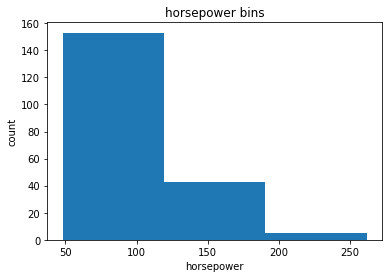

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [ ]:
dummy_variable_1 = pd.get_dummies(df["age"])
dummy_variable_1.head()

Change the column names for clarity:


In [ ]:
dummy_variable_1.rename(columns={'generation_1':'generation_2', 'generation_3':'generation_3'}, inplace=True)
dummy_variable_1.head()

fuel-type-diesel  fuel-type-gas
0                 0              1
1                 0              1
2                 0              1
3                 0              1
4                 0              1

In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


```

</details>


## Save the new csv:


In [ ]:
#df.to_csv('clean_df.csv')

### Thank you for completing this lab!

## Author

Mary Tziraki

### Other Contributors



                                                                                     
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-03-30        | 2.2     | M.T.       | Update                 |
| 2022-03-06        | 2.1     | M.T        | Updated |
| 2022-03-04        | 1.00    | M.Tziraki  | Moved lab to course repo in GitLab  |

<hr>
                                                                                     

## <h3 align="center"> © IDEAS 2022. All rights reserved. <h3/>
